In [4]:
import time
import json
import requests
url='https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
#抓取腾讯疫情实时数据
data=json.loads(requests.get(url=url).json()['data'])
print(data['lastUpdateTime'])

2020-06-20 15:04:24


In [5]:
type(data),len(data)
(dict,12)
print(data.keys())
#获取数据信息

dict_keys(['lastUpdateTime', 'chinaTotal', 'chinaAdd', 'isShowAdd', 'showAddSwitch', 'areaTree'])


In [6]:
#统计省份信息
num=data['areaTree'][0]['children']
print(num[0])

{'name': '北京', 'today': {'confirm': 22, 'confirmCuts': 0, 'isUpdated': True, 'tip': '北京累计报告境外输入确诊病例174例。\n北京卫健委未明确治愈病例和死亡病例的归属分区，北京分区现有确诊数据暂无法获取。'}, 'total': {'nowConfirm': 206, 'confirm': 799, 'suspect': 0, 'dead': 9, 'deadRate': '1.13', 'showRate': False, 'heal': 584, 'healRate': '73.09', 'showHeal': True}, 'children': [{'name': '丰台', 'today': {'confirm': 13, 'confirmCuts': 0, 'isUpdated': True}, 'total': {'nowConfirm': 144, 'confirm': 187, 'suspect': 0, 'dead': 0, 'deadRate': '0.00', 'showRate': False, 'heal': 43, 'healRate': '22.99', 'showHeal': False}}, {'name': '大兴', 'today': {'confirm': 8, 'confirmCuts': 0, 'isUpdated': True}, 'total': {'nowConfirm': 36, 'confirm': 75, 'suspect': 0, 'dead': 0, 'deadRate': '0.00', 'showRate': False, 'heal': 39, 'healRate': '52.00', 'showHeal': False}}, {'name': '海淀', 'today': {'confirm': 1, 'confirmCuts': 0, 'isUpdated': True}, 'total': {'nowConfirm': 8, 'confirm': 72, 'suspect': 0, 'dead': 0, 'deadRate': '0.00', 'showRate': False, 'heal': 64, 'h

In [7]:
beijing=num[0]
beijing.keys()
beijing['total']

{'nowConfirm': 206,
 'confirm': 799,
 'suspect': 0,
 'dead': 9,
 'deadRate': '1.13',
 'showRate': False,
 'heal': 584,
 'healRate': '73.09',
 'showHeal': True}

In [8]:
beijing['children'][0]['total']

{'nowConfirm': 144,
 'confirm': 187,
 'suspect': 0,
 'dead': 0,
 'deadRate': '0.00',
 'showRate': False,
 'heal': 43,
 'healRate': '22.99',
 'showHeal': False}

In [9]:
# 解析北京市不同地区确诊的总数据 
beijing_children_total_data = {} 
for item in beijing['children']: 
    if item['name'] not in beijing_children_total_data: 
        beijing_children_total_data.update({item['name']:0}) 
        beijing_children_total_data[item['name']] += int(item['total']['confirm']) 
print(beijing_children_total_data)

{'丰台': 187, '大兴': 75, '海淀': 72, '东城': 19, '西城': 57, '房山': 20, '门头沟': 5, '境外输入': 174, '石景山': 15, '朝阳': 76, '地区待确认': 1, '外地来京': 25, '通州': 19, '昌平': 29, '密云': 7, '顺义': 10, '怀柔': 7, '延庆': 1}


In [10]:
# 解析每个省份确诊的总人数 
total_data = {} 
for item in num: 
    if item['name'] not in total_data: 
        total_data.update({item['name']:0}) 
        for city_data in item['children']: 
            total_data[item['name']] += int(city_data['total']['confirm']) 
print(total_data) 

{'北京': 799, '香港': 1127, '上海': 698, '四川': 589, '河北': 341, '广东': 1634, '甘肃': 151, '陕西': 314, '台湾': 446, '辽宁': 153, '福建': 362, '内蒙古': 238, '重庆': 582, '天津': 197, '海南': 171, '浙江': 1269, '贵州': 147, '青海': 18, '新疆': 76, '黑龙江': 947, '澳门': 45, '安徽': 991, '西藏': 1, '山东': 792, '江西': 932, '云南': 185, '广西': 254, '山西': 198, '湖北': 68135, '吉林': 155, '江苏': 653, '宁夏': 75, '河南': 1276, '湖南': 1019}


In [11]:
print(beijing_children_total_data)

{'丰台': 187, '大兴': 75, '海淀': 72, '东城': 19, '西城': 57, '房山': 20, '门头沟': 5, '境外输入': 174, '石景山': 15, '朝阳': 76, '地区待确认': 1, '外地来京': 25, '通州': 19, '昌平': 29, '密云': 7, '顺义': 10, '怀柔': 7, '延庆': 1}


In [12]:
bj_names=beijing_children_total_data.keys()
bj_numbers=beijing_children_total_data.values()

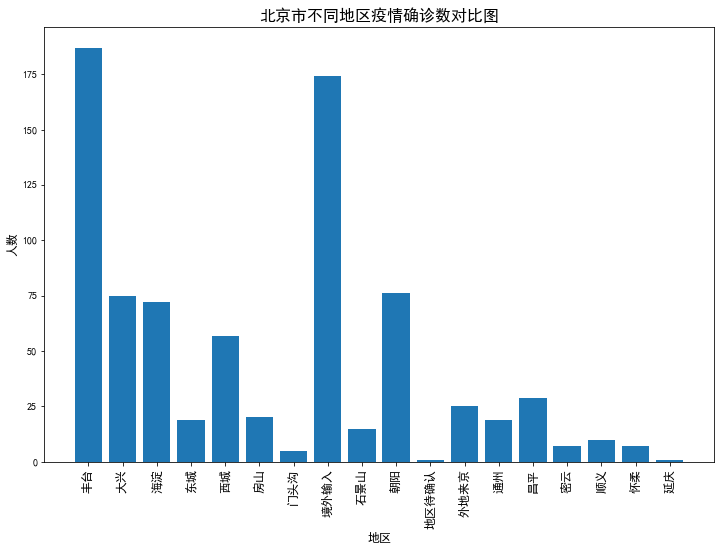

In [13]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.rcParams['font.sans-serif'] = ['simhei'] # 用来正常显示中文标签 
# 绘图 
plt.figure(figsize=[12,8]) 
plt.bar(bj_names,bj_numbers) 
plt.xlabel("地区", size=12) 
plt.ylabel("人数", fontproperties='SimHei', rotation=90, size=12) 
plt.title("北京市不同地区疫情确诊数对比图", size=16) 
plt.xticks(list(bj_names), rotation=90, size=12) 
plt.show()

In [24]:
names=total_data.keys()
numbers=total_data.values()
print(total_data) 

{'北京': 799, '香港': 1127, '上海': 698, '四川': 589, '河北': 341, '广东': 1634, '甘肃': 151, '陕西': 314, '台湾': 446, '辽宁': 153, '福建': 362, '内蒙古': 238, '重庆': 582, '天津': 197, '海南': 171, '浙江': 1269, '贵州': 147, '青海': 18, '新疆': 76, '黑龙江': 947, '澳门': 45, '安徽': 991, '西藏': 1, '山东': 792, '江西': 932, '云南': 185, '广西': 254, '山西': 198, '湖北': 68135, '吉林': 155, '江苏': 653, '宁夏': 75, '河南': 1276, '湖南': 1019}


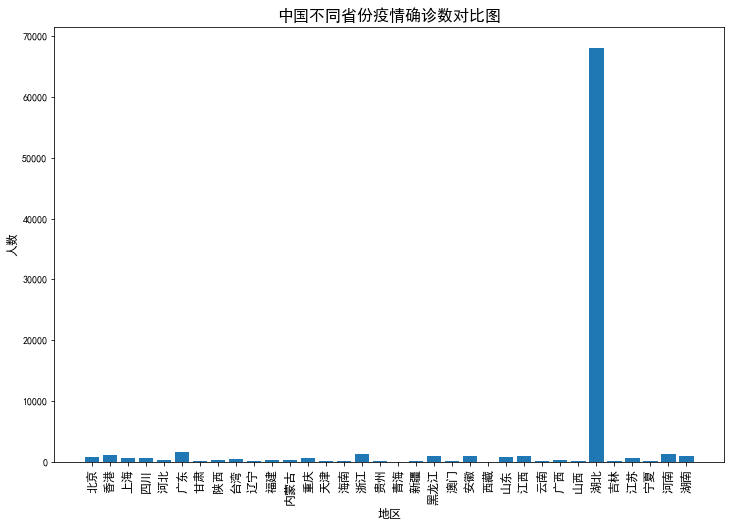

In [15]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.rcParams['font.sans-serif'] = ['simhei'] # 用来正常显示中文标签 
# 绘图 
plt.figure(figsize=[12,8]) 
plt.bar(names,numbers) 
plt.xlabel("地区", size=12) 
plt.ylabel("人数", fontproperties='SimHei', rotation=90, size=12) 
plt.title("中国不同省份疫情确诊数对比图", size=16) 
plt.xticks(list(names), rotation=90, size=12) 
plt.show()

In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
import time
import json
import requests
from datetime import datetime

url = 'https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_cn_day_counts&callback=&_=%d'%int(time.time()*1000)
data = json.loads(requests.get(url=url).json()['data'])
data.sort(key=lambda x:x['date'])
    
date_list = list()       # 日期
confirm_list = list()    # 确诊
suspect_list = list()    # 疑似
dead_list = list()       # 死亡
heal_list = list()       # 治愈
for item in data:
    month, day = item['date'].split('/')
    date_list.append(datetime.strptime('2020-%s-%s'%(month, day), '%Y-%m-%d'))
    confirm_list.append(int(item['confirm']))
    suspect_list.append(int(item['suspect']))
    dead_list.append(int(item['dead']))
    heal_list.append(int(item['heal']))

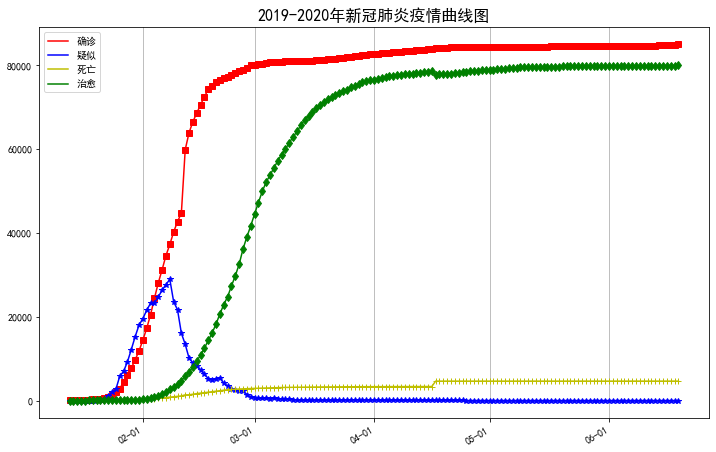

In [18]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
plt.rcParams['font.sans-serif'] = ['simhei'] # 用来正常显示中文标签 
plt.figure(figsize=(12, 8)) 
plt.title('2019-2020年新冠肺炎疫情曲线图', fontsize=16) 
plt.plot(date_list, confirm_list, 'r-', label='确诊') 
plt.plot(date_list, confirm_list, 'rs') 
plt.plot(date_list, suspect_list, 'b-',label='疑似') 
plt.plot(date_list, suspect_list, 'b*') 
plt.plot(date_list, dead_list, 'y-', label='死亡') 
plt.plot(date_list, dead_list, 'y+') 
plt.plot(date_list, heal_list, 'g-', label='治愈') 
plt.plot(date_list, heal_list, 'gd') 

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) # 格式化时间轴标注 
plt.gcf().autofmt_xdate() # 优化标注（自动倾斜） 
plt.grid(axis='x') # 显示网格 
plt.legend() # 显示图例 
plt.show()

In [28]:
#根据疫情生成不同地区的词云
import wordcloud
import imageio
mk = imageio.imread("picture.png")
w = wordcloud.WordCloud(mask=mk)
w = wordcloud.WordCloud(width=1000,
                        height=700,
                        background_color='black',
                        font_path='msyhl.ttc',
                        mask=mk,
                        relative_scaling=0,
                        scale=10)


# 将string变量传入w的generate()方法，给词云输入文字
w.generate_from_frequencies(total_data)

# 将词云图片导出到当前文件夹
w.to_file('mypicture.png')